In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [33]:
df=pd.read_csv('winequality.csv',sep=';')
df.head()
# df['quality'].unique()
# df[['quality']]=OneHotEncoder().fit_transform(df[['quality']])
# df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

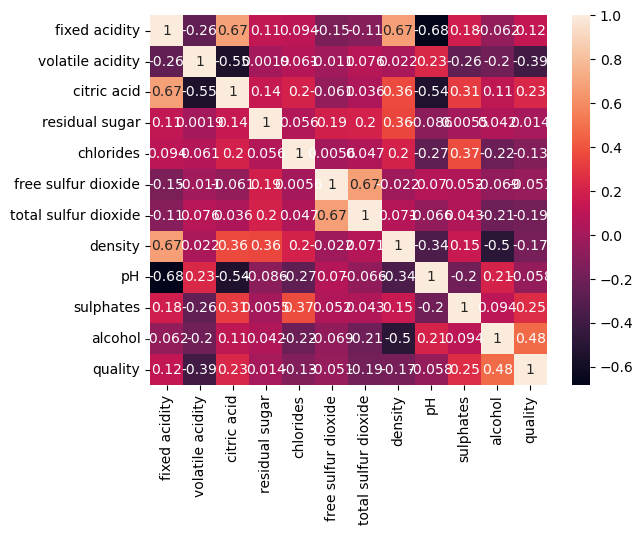

In [47]:
sns.heatmap(df.corr(),annot=True)
df.shape

In [ ]:

y = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
x = df.drop(columns=['quality'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


preprocess=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])
    ]
)
pipe=Pipeline([
    ('step',preprocess),
    ('pca',PCA(n_components=0.95)),
    ('model',RandomForestClassifier(
        n_estimators=500, 
        max_depth=20,       
        class_weight='balanced', 
        random_state=42))
])
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)
print('Accuracy : ',np.round(accuracy_score(y_test,pred),2)*100,'%')

Accuracy :  92.0 %
